In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv("bodyfind.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,20].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train_flattened = X_train.reshape(len(X_train),20)
X_test_flattened = X_test.reshape(len(X_test),20)

In [5]:
model = keras.Sequential([
    
    keras.layers.Dense(19,input_shape=(20,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(6,activation='sigmoid')
   
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=11)

Epoch 1/11
30/30 [==============================] - 4s 6ms/step - loss: 1.5330 - accuracy: 0.5177
Epoch 2/11
30/30 [==============================] - 0s 5ms/step - loss: 1.2464 - accuracy: 0.5198
Epoch 3/11
30/30 [==============================] - 0s 6ms/step - loss: 0.8476 - accuracy: 0.5667
Epoch 4/11
30/30 [==============================] - 0s 5ms/step - loss: 0.4299 - accuracy: 0.8490
Epoch 5/11
30/30 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8885
Epoch 6/11
30/30 [==============================] - 0s 7ms/step - loss: 0.1836 - accuracy: 0.9073
Epoch 7/11
30/30 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9552
Epoch 8/11
30/30 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9438
Epoch 9/11
30/30 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9937
Epoch 10/11
30/30 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 11/11
30/30 [

8/8 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

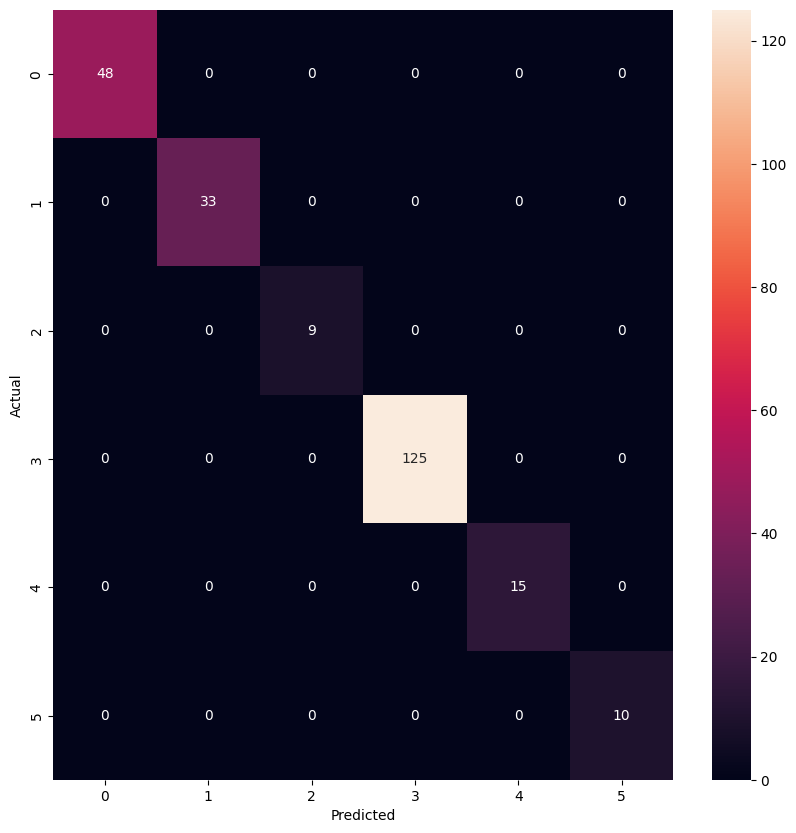

In [7]:
y_predict = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [12]:
model_json = model.to_json()

# Save the model JSON to a file
model_path = 'D:\prakriti-analysis\ml\model.json'
with open(model_path, 'w') as json_file:
    json_file.write(model_json)

print("Model saved as JSON file: {model_path}")


Model saved as JSON file: {model_path}
